 # TSF Task 3
 # Pravart Srivastava

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot

## Importing Dataset

In [2]:
Dataset = pd.read_csv("SampleSuperstore.csv")
Dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
Dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Checking for null values

In [5]:
Dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Dataset Information

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
Dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
Dataset.shape

(9994, 13)

### Data Description

In [11]:
Dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
print("\t>>> Datatypes <<<\n")
Dataset.dtypes

	>>> Datatypes <<<



Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### Correlation

<AxesSubplot:>

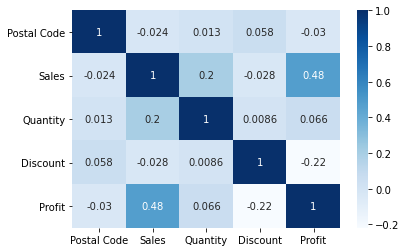

In [14]:
correlation = Dataset.corr()
sns.heatmap(correlation , cmap = 'Blues', annot = True)

In [15]:
Dataset = Dataset.drop(['Postal Code'], axis = 1)

## Product-wise Analysis

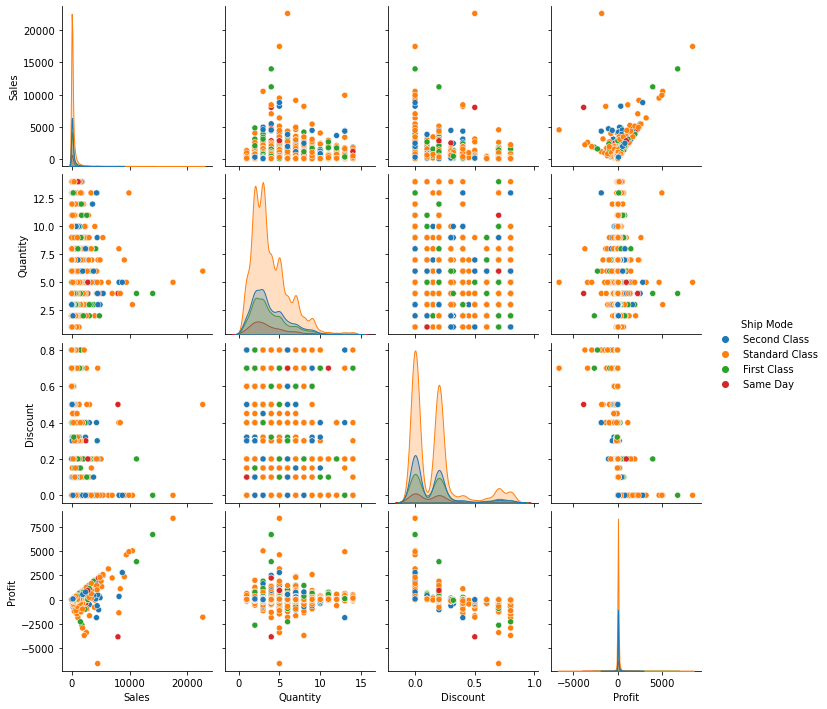

In [17]:
sns.pairplot(Dataset, hue = 'Ship Mode')

In [18]:
Dataset['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

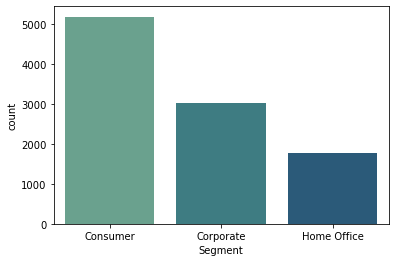

In [19]:
sns.countplot(x = 'Segment', data = Dataset, palette = 'crest')

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

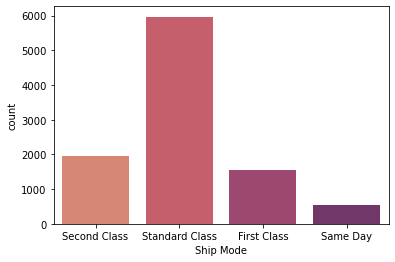

In [20]:
sns.countplot(x = Dataset['Ship Mode'] , palette = 'flare')

In [21]:
Dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

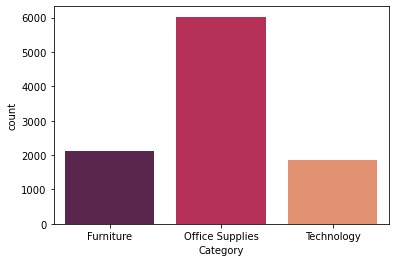

In [22]:
sns.countplot(x = 'Category', data = Dataset, palette = 'rocket')

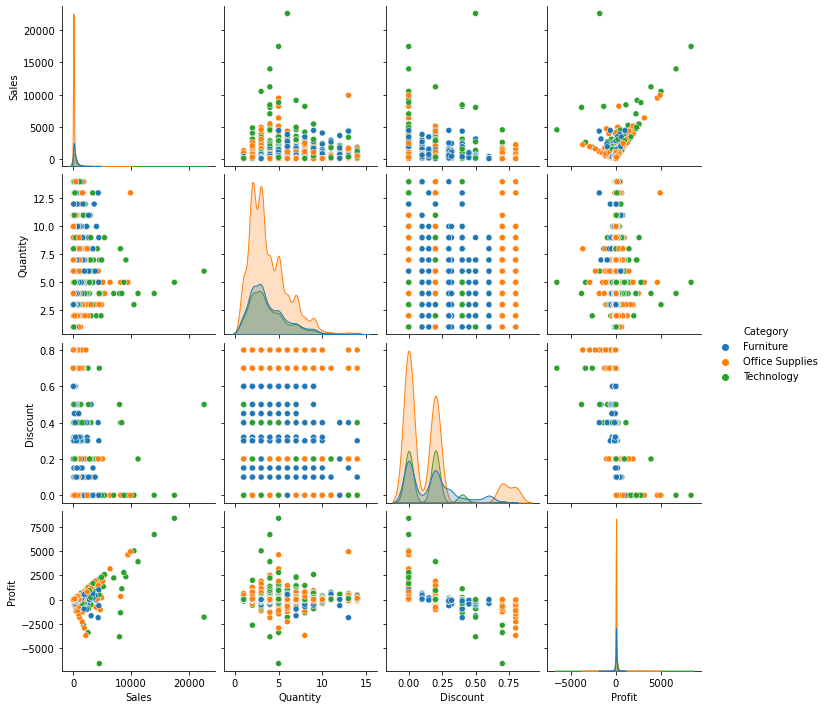

In [23]:
sns.pairplot(Dataset, hue = 'Category')

## Category wise Profit/Loss Analysis

C:\Users\prava\anaconda3\envs\Environment 1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


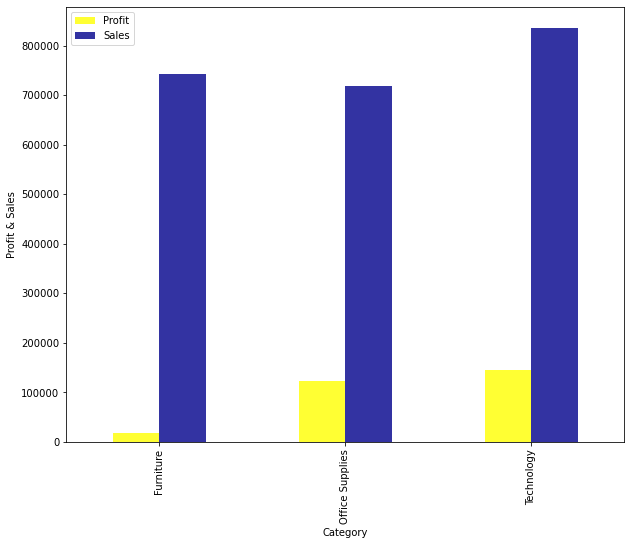

In [69]:
Dataset.groupby('Category')['Profit','Sales'].sum().plot.bar(color = ['yellow','darkblue'], alpha = 0.8, figsize = (10,8))
plt.ylabel('Profit & Sales')
plt.show()

## Product Sub Category Analysis

In [27]:
Dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

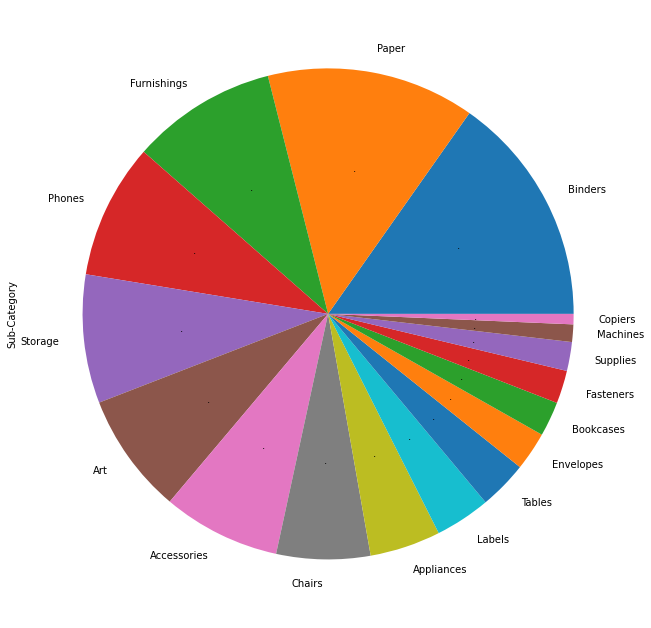

In [28]:
plt.figure(figsize= (11,13))
Dataset['Sub-Category'].value_counts().plot.pie(autopct = '.')
plt.show()

## State-wise Analysis

In [30]:
Dataset['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

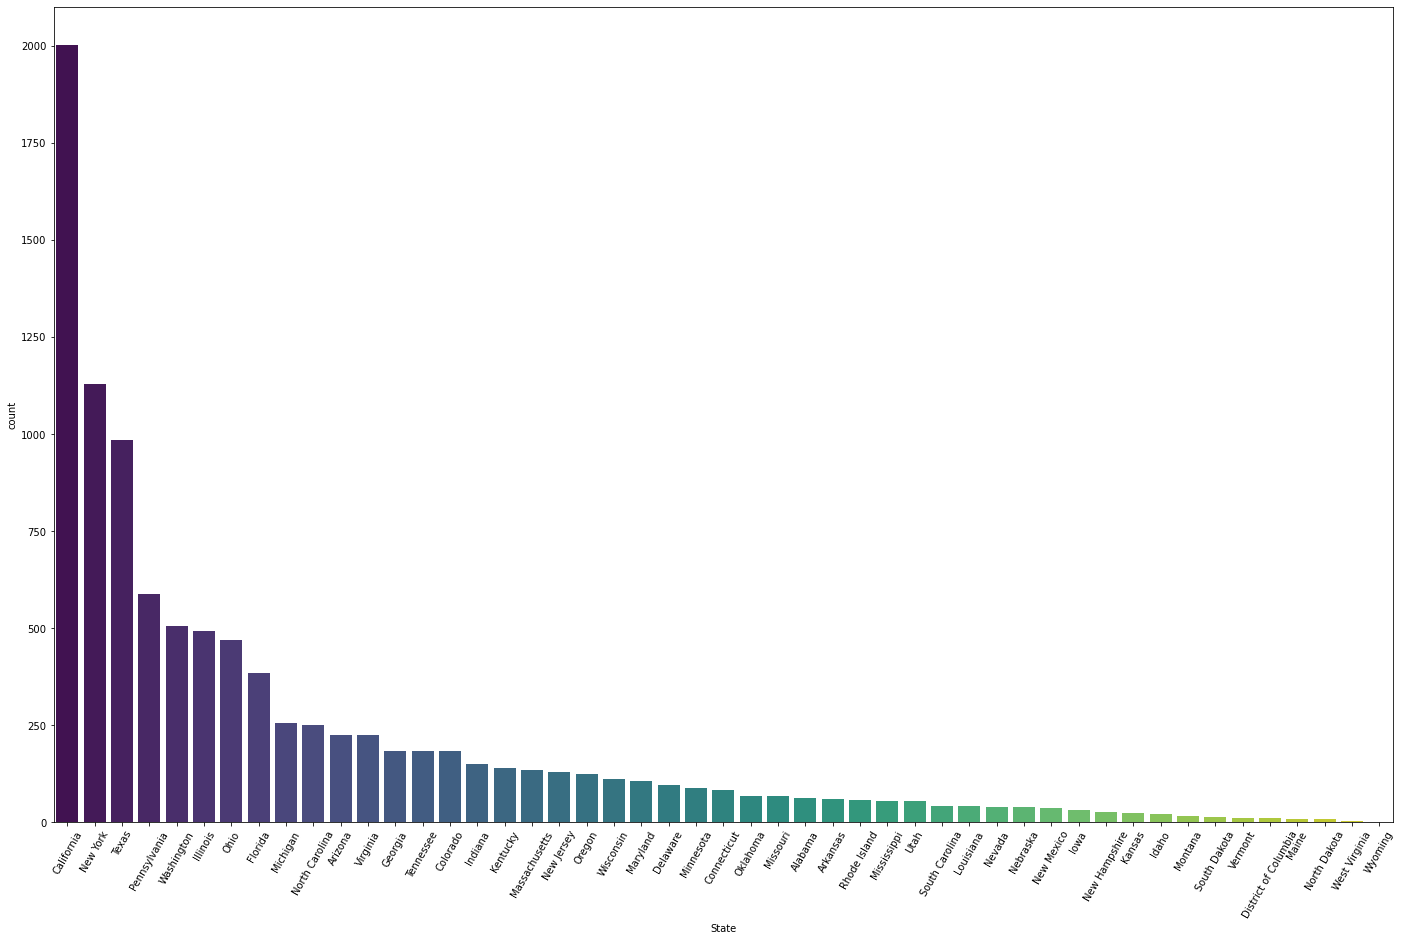

In [31]:
plt.figure(figsize= (24,15))
sns.countplot(x = 'State', data = Dataset, palette = 'viridis',order = Dataset['State'].value_counts().index )
plt.xticks(rotation = 60)
plt.show()

## Profit-Discount Analysis

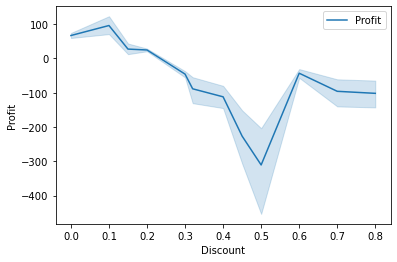

In [33]:
sns.lineplot(x= 'Discount', y = 'Profit', label = 'Profit', data= Dataset)
plt.legend()
plt.show()

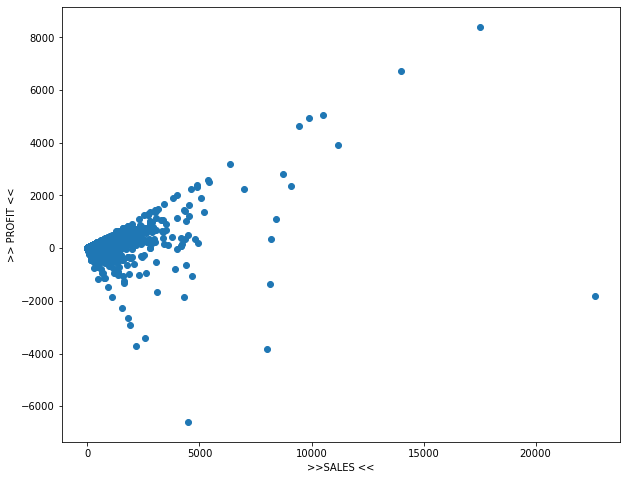

In [34]:
fig,ax = plt.subplots(figsize = (10,8))
ax.scatter (Dataset['Sales'], Dataset['Profit'])
ax.set_xlabel('>>SALES <<')
ax.set_ylabel('>> PROFIT <<')
plt.show()

### Profit - Quantity Analysis

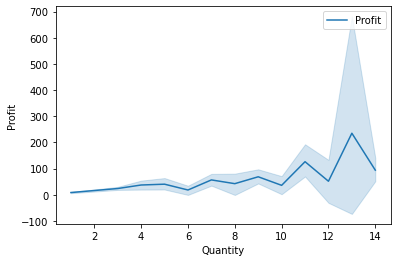

In [35]:
sns.lineplot(x= 'Quantity', y = 'Profit', label = 'Profit', data= Dataset)
plt.legend()
plt.show()

## State-wise Profit / Loss & Sales

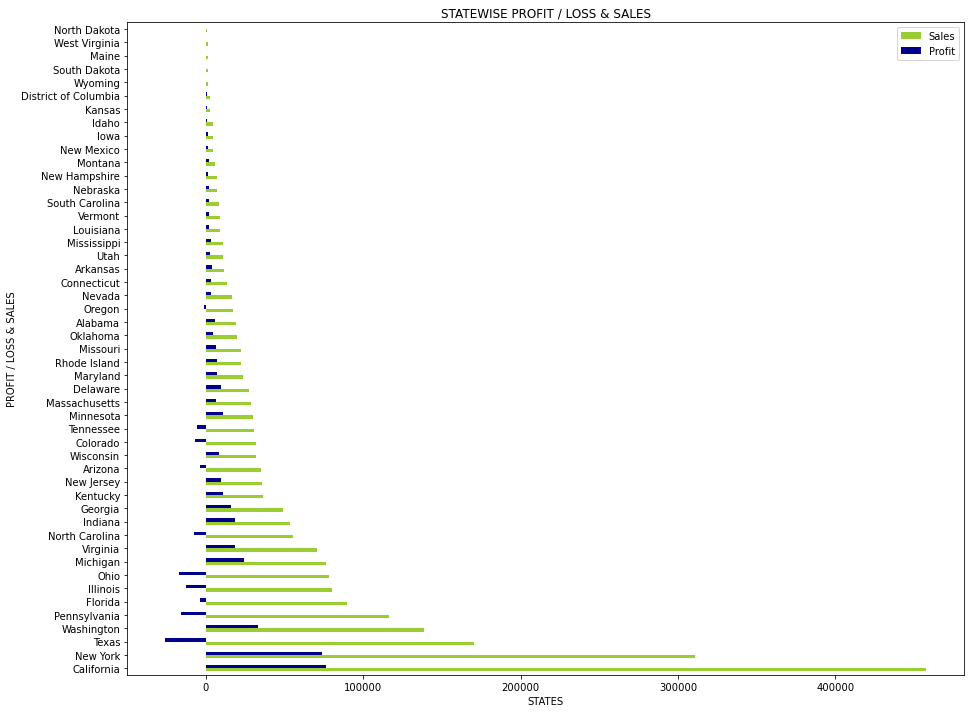

In [42]:
graph = Dataset.groupby('State')[['Sales', 'Profit']].sum().sort_values(by = 'Sales', ascending = False)
graph[:].plot.barh(figsize = (15,12), color = ['yellowgreen', 'darkblue'])
plt.title('STATEWISE PROFIT / LOSS & SALES')
plt.xlabel('STATES')
plt.ylabel('PROFIT / LOSS & SALES')
plt.show()

## Top 9 Performing States

In [49]:
Best_states = Dataset['State'].value_counts().nlargest(9)
print('The Top 9 Performing states are: ')
Best_states

The Top 9 Performing states are: 


California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Illinois         492
Ohio             469
Florida          383
Michigan         255
Name: State, dtype: int64

## Least Performing States

In [71]:
Low_states = Dataset['State'].value_counts().nsmallest(9)
print('The 9 Lowest Performing states are: ')
Low_states

The 9 Lowest Performing states are: 


Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Name: State, dtype: int64

# Observation & Conclusion

## State Analysis

#### Top performing state: California
####  Least performing state: Wyoming
#### Maximum Profit : California
####  Least Profit: Wyoming





## Category Analysis

#### Highest Sales: Technology
#### Lowest Sales: Office Supplies
#### Maximum Profit: Technology
#### Least Profit: Furniture




## Sub-Category Analysis

#### Most In-demand product: Binders
#### Least In-demand product: Copiers

#### Most Used Shipping mode: Standard Delivery 






# Thank you
# Pravart Srivastava